輸入立委臉書粉專內容及選舉政見資料

In [1]:
import pandas as pd
import jieba
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
fb1=pd.read_csv('nysu_10902_2019立委_research.csv')
fb2=pd.read_csv('nysu_10902_2019_research_right.csv')
fba=pd.merge(fb1,fb2,how="outer")
fb3=pd.read_csv('nysu_10902_2019立委_research_補.csv')
fb4=pd.read_csv('nysu_10902_2019立委_research_補2.csv')
fbb=pd.merge(fb3,fb4,how="outer")
fb5=pd.read_csv('nysu_10902_2019立委_research_補3.csv')
fb6=pd.read_csv('nysu_10902_2019立委_research_補4.csv')
fbc=pd.merge(fb5,fb6,how="outer")
fb7=pd.read_csv('nysu_10902_2019立委_research_補5.csv')

In [2]:
fbA=pd.merge(fba,fbb,how="outer")
fbB=pd.merge(fbc,fb7,how="outer")

In [3]:
fb=pd.merge(fbA,fbB,how="outer")
pd.set_option('display.max_colwidth', None)#setting the maximize string show
politics = pd.read_csv('9th_legislator_promise.csv')

In [4]:
import numpy as np
from collections import Counter

fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

以台北市立委費鴻泰為例，建立發文文字斷詞表

In [5]:
#fb 總共有哪些立委
fb['page_name'].unique()

array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘', '莊瑞雄', '楊曜Yangyao', '郭國文', '洪宗熠-熠起更好', '陳歐珀', '林俊憲', '蔣萬安',
       '立法委員 馬文君', '鍾佳濱', '費鴻泰（阿力克司）', '何志偉', '余天 Yu Tian', '陳素月SayYes',
       '陳超明-阿明哥粉絲團', '登真-邱議瑩'], dtype=object)

In [6]:
fei = fb[fb.page_name == "費鴻泰（阿力克司）"]
fei.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
35005,893657620668012_2235795896454171,893657620668012,費鴻泰（阿力克司）,Politician,「費鴻泰＋徐巧芯」，本週日初登場！\n\n市場服務全新升級版\n\n號外、號外！年輕、活力的新科議員徐巧芯，將與鴻泰一起走進菜市仔為民服務。「費鴻泰＋徐巧芯」世代合作的市場聯合擺攤服務首映會，1/6（本週日），就在福德街225號、福德市場隆重獻映！\n\n鴻泰週六、日都是在各市場擺攤服務，零距離協助民眾解決問題。這樣的擺攤服務已歷24個寒暑，也是全國唯一在市場擺攤服務的立法委員。巧芯議員新手上路卻接地氣，迫不及待要和鴻泰同往市場民服務。這般政壇首見的世代聯合擺攤服務，將會在菜市仔內擦出什麼樣的火花，走過、路過，可千萬不要錯過！\n\n2019.01.06（日）0930-1130 福德市場（福德街225號）\n\n＃專業熱情派 #費鴻泰\n＃年輕活力派 #徐巧芯\n＃歡迎大家來尬聊,費鴻泰（阿力克司） is with Chiao Hsin Hsu and 費鴻泰.,photo,https://www.facebook.com/893657620668012/posts/2235795896454171/,2019-01-03T13:21:22+0000,2019-01-03T21:21:22,...,NaN,NaN,1492,0,0,0,0,0,43,37


In [7]:
fei['new_date'] = pd.to_datetime(fei['created_time_taipei']).dt.date
fei['month_year'] = pd.to_datetime(fei['new_date']).dt.to_period('M')
fei.head(1)

<ipython-input-7-0a601e7c9da8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fei['new_date'] = pd.to_datetime(fei['created_time_taipei']).dt.date
<ipython-input-7-0a601e7c9da8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fei['month_year'] = pd.to_datetime(fei['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
35005,893657620668012_2235795896454171,893657620668012,費鴻泰（阿力克司）,Politician,「費鴻泰＋徐巧芯」，本週日初登場！\n\n市場服務全新升級版\n\n號外、號外！年輕、活力的新科議員徐巧芯，將與鴻泰一起走進菜市仔為民服務。「費鴻泰＋徐巧芯」世代合作的市場聯合擺攤服務首映會，1/6（本週日），就在福德街225號、福德市場隆重獻映！\n\n鴻泰週六、日都是在各市場擺攤服務，零距離協助民眾解決問題。這樣的擺攤服務已歷24個寒暑，也是全國唯一在市場擺攤服務的立法委員。巧芯議員新手上路卻接地氣，迫不及待要和鴻泰同往市場民服務。這般政壇首見的世代聯合擺攤服務，將會在菜市仔內擦出什麼樣的火花，走過、路過，可千萬不要錯過！\n\n2019.01.06（日）0930-1130 福德市場（福德街225號）\n\n＃專業熱情派 #費鴻泰\n＃年輕活力派 #徐巧芯\n＃歡迎大家來尬聊,費鴻泰（阿力克司） is with Chiao Hsin Hsu and 費鴻泰.,photo,https://www.facebook.com/893657620668012/posts/2235795896454171/,2019-01-03T13:21:22+0000,2019-01-03T21:21:22,...,1492,0,0,0,0,0,43,37,2019-01-03,2019-01


In [8]:
# 依照按讚數 低到高排序
fei = fei.sort_values(by=['like_count'])
# 用新的排序當作順序
fei.reset_index(inplace=True)

結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [9]:
doc_names = range(len(fei)) #有幾篇文章 : 444 篇文章
doc_names

range(0, 398)

In [10]:
fei = fei.replace(np.nan, '', regex=True) # 將nan取代成空白字串
text_list = list(fei['message']) # 把所有message轉成一個list 用for iterate

What is the difference between lcult() & cut()

In [11]:
# 先看第一個
words = jieba.lcut(text_list[5], cut_all = False) # lcut return a "list"
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.744 seconds.
Prefix dict has been built succesfully.


['【', '#', '直播', '】', '\n', '奸巧', '彈劾', '管中', '閔', ' ', ' ', '蔡系', '監委', '自甘', '墮落']


In [12]:
words = jieba.cut(text_list[5], cut_all = False) 
print(words)
#for word in words:
 #   print(word)

<generator object Tokenizer.cut at 0x00000224DD57DDD0>


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [13]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")
punctuation = " //，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
fei_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
fei_docs['jieba_results'] = fei_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text) # 把上面那些符號從text中刪掉
    text = re.sub(r'[0-9]','',text) # 刪掉數字
    text = re.sub(r'[a-zA-Z]','',text) #刪掉英文字
#刪除文字 更多標點符號
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪㊙️✨🔺😁😅😍⬇🙏✅🎈🔥📱👍👊🔸📍👉📢👩📌💼]','',text)  # 注意裡面不能有空白！
    s = pd.Series({'jieba_results': text})
    fei_docs = fei_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs


In [14]:
fei_docs.iloc[385:,]  #從讚數最多的檢查

,jieba_results
385,月 日 這個 只紀念 不 放假 的 日子 有 多少 人 還記 得 是 教師節 還記 得 向 我們 的 老師們 說聲 辛苦 了 感念 老師 的 付出 從政 之前 自己 在 大學 任教 出身 學界 也 身為 三個 孩子 的 父母 始終 對 於 教育 有 一份 特別 的 關切 與 使命 因此 也 特別 關心 擔任 立法委員 以來 更 全力 捍衛師 生權益 提升 教育 品質 一路 走來 始終 堅 定力 挺教師 組織 與 教師 權益 回顧 也 簡要 的 盧列 對 於 教師 權益 的 一些 爭取 希望 沒有 辜負 所 託 ◆ 堅定 支持 教師 組織 工會 捍衛 教師 勞動 三權 長期 力挺 教師 組織 工會 組織 了 工會 卻 又 遇許 多 工會 的 基本 權利 被 不當 限制 我 始終 堅守 立場 和 教師 站 在 一起 確保教師 工會 合理 的 運作 空間 ◆ 解決 台北市 教師 會會址 問題 ◆ 成功 爭取 高中職 國中 小 幼兒園 教師 加班 費性 質鐘 點費 免納 所得 稅 向 賦稅署 教育部 爭取 多時 終於 讓 全體 中小 學教師 都 可以 享有 學 期中 寒暑假 加班 費性 質鐘 點費 免納 所得 稅 ◆ 成功 爭取 高中職 教師 納為 緩召 對象 邀集 內政部 國防部 教育部 及 全教 總 共同 研商 高中職 教師 緩召 年 高中職 專 任教 師 可以 教召 緩召 年 長期 代理 教師 可以 申請 免除 聘期 內該 次 教召 完成 兵役法 第 條修法 國防部 近日 發布 兵役法 第 條的 所涉 範圍 基準表 已將 長期 代理 教師 明文 納入 ◆ 堅定 支持 幼教 公共 化立場 ◆ 力阻 反對 在 軍 公教 退休 給付 的 改革 中 對 於 軍 公教 的 污名 化 尚有 審計 單位 查察 公立 學校 教師 兼職 因年終 考核 與 懲處過 苛 之 認定 退撫 基金 操作 績效 及 管理模式 仍有 許多 進行 中 或 已 完成 的 爭取 一切 的 努力 只 希望 對 於 教師 的 工作 場域 工作 條件 的 改善 與 教育 尊嚴 的 提升 能 貢獻 付出 一些 心力 祝福 為 了 我們 孩子 不斷 付出 的 教師 教師節 快樂 整個 城市 都 是 我 的 服務處 市場 服務 和 大家 相約 歡迎 一起 聊聊 六 復 盛區民 活動 中心 市民 大道 段 之 號 日 吳興 商圈 吳興街 號 歡迎給 我們 指教 建議 基層 地方 服務 市場 服務 信義區 松山 區 松山 信義 費鴻泰 韓國瑜
386,擺攤 立委 力挺 賣 菜市 長 共同 創造 經濟 新 契機 高雄市 長 韓國瑜 為 民生 拚經濟 昨天 在 香港 拚訂 單 高雄市 農會 漁會 與 多家 香港 供應商 簽訂 合約 首日 簽約 金額 就 高達 新 台幣 億元 費鴻泰 呼籲 讓 我們 用 實際 力量 支持 賣 菜市 長 啓 動 臺灣 經濟 新 契機 在 沒 有 自經區 的 情況 下 韓市長 就 已經 能 交出 漂亮 的 成績 單 可見 不是 臺灣 人不爭氣 是 蔡政府 不成材 自經區 的 相關 政策 如果 順利 推動 甚至 可 直接 在 全台 簽訂 單 不 只是 在 一個 地方 全國 的 外銷 成績 一定 翻倍 再 翻倍 貨出 的 去 人進 的 來 臺灣 發大財 擺攤 立委 用 經濟 政策 挺 賣 菜市 長 費鴻泰 在 中央會 更 積極 推動 自經區 法案 讓 臺灣 的 景氣 復 甦 經濟 巨人 奮力 而 起 我用 經濟 政策 挺韓 推動 自經區 韓國瑜
387,規避 民意 監督 公然 護航 弊案 民進黨 變 包庇 黨 蔡英文 總統 府 爆出 私 菸 案 醜聞 接著 英系 大將 陳 明文 立委 遺失 萬元 在 高鐵 民進黨 政府 對 於 這些 荒腔走板 的 行為 不檢討 不向 人民 解釋 清楚 成天 只會護航 包庇 面對 立委 質疑 與 監督 民進黨 官員展 現出 來 的 卻 是 傲慢 輕浮 這樣 的 進步 價值 令人 不敢 恭維 國民黨 立委 就 民進黨 立委 陳 明文 遺失 萬元 案件 質詢 法務部次 長 蔡碧仲 但 蔡碧仲面 對 立委 質詢 不僅 態度 傲慢 還反 質詢 立委 費鴻泰 提出 外界 對陳明 文案 的 眾多 質疑 蔡碧仲 卻 無法 給出 清楚 解釋 只是 不斷 耍嘴皮 媒體 今日 更 踢爆 華航 與 華膳 高層 包庇 走私 非法 私運 的 菸 品 與 免稅品 昨天 在 華 航空 品處 與 一處 桃園 民宅 被 搜出 來 了 且 已經 被 抽掉 條 華航後台 網購 系統 有 一 名叫 林家 如 的 人 訂購 了 條 菸 稍早 遭到 踢爆 這名 林家 如 為 總統 府諮議 權力 使 人 腐化 絕對 的 權力 使 人 絕對 的 腐化 這句 名言 如今 拿來 對照 全面 執政 三年 的 民進黨 不禁 讓 人 唏噓 如果 三年 就 能 讓 民進黨 的 權力 傲慢 到 公然 包庇 弊案 不 受 民意 監督 再 讓 民進黨 繼續 執政 我們 的 政府 還能 不 病入膏肓 嗎 民進黨 私 菸 案 陳 明文 萬 華航
388,費鴻泰 參選 立委 黨內初選 自我 說明 費鴻泰 擁有 美國 肯塔基 大學統 計學 博士 曾 任國立 中興大學 與 臺 北大 學專任 副教授 從 年 起 鴻 泰當選 第七 八 九屆 台北市 議員 並 擔任 過 第八 屆 台北市 議會 副 議長 在 年 進入 立法院 鴻 泰當選 第六 七 八 九屆 立法委員 期間 擔任 過 國民黨 政策 會 代理 執行長 立法院 國民黨團 書記長 立法院 財政委員會 委員 長 與 召集委員 等 職務 提供 選民 看 得到 找 得到 的 優質 服務 是 個 人 從政 的 基本 理念 費鴻泰 一直 以 以民為 先 的 立場 選民服務 全力以赴 並以 忠黨 愛國 之心 為 黨 為國 努力 奮鬥 正直 敢言 清廉 專業 是鴻泰 對 人民 與 黨國 不變 的 承諾 鴻泰來 自基層 秉持 貼近 民意 最 接地 氣 的 精神 持續 年 多 市場 服務 與 報稅 服務 等 工作 直接 深入 社區 瞭解 民意 為 人民 發聲 督促 執政團隊 以 造福人群 為 主旨 費鴻泰 此次 參選 立法委員 的 連任 以 提升 我國 經濟發展 與 爭取 人民 權益 為 重心 將 致力 於 推動 國家 科技 創新 計畫 自由 貿易 相關 財經 政策 有利 小資族 稅制改革 減輕 家庭 負擔 長照 特別 扣除 額 銀髮族 酷老樂活 方案 等 因此 鴻泰將 努力 為 全民 開創 公平 透明 和 樂 的 新 社會 以 增強 國家 整體 競爭力 學歷 · 美國 肯塔基 大學統 計學 博士 · 美國北 伊利 諾大學 統計學 碩士 · 國立 中興 大學統 計學學士 · 成功 高 中 · 大安 國中 · 三興 國小 · 信義 國小
389,民進黨 執政 不准 任何人 質疑 總統 否則 恐成 被告 自從 民進黨 執政 尤其 去年 地方 選舉 大敗 之 後 凡是 有人 對 於 民進黨 的 施政 民進黨 政治 人物 的 人品 或學歷 提出 質疑 者 不管 提出 質疑 的 是 代議 人士 或是 一般 平民百姓 民進黨 經常會 對 此 提起 訴訟 提告 動作 簡直 比 膝 反射 速度 還快 民進黨 這樣 做 美其名 是 維護 自身 清白 但是 實際 上 就是 換了 位置 換了 腦袋 製造 寒蟬 效應 而已 台大 法律 學系 名譽 教授 賀德芬 昨天 再度 質疑 蔡英文 總統 學歷 對 於 此事 蔡英文 則 表示 在 備妥 相關 文件 後 我會 對 相關 人士 採取 法律 行動 提起 告訴 當 蔡英文 面對 質疑 就要 提告 的 同時 是不是 已經 忘記 當年 民進黨 發言人 誣陷 馬 總統 向 賭盤 大亨 有 募款 操縱 賭盤 影響 選舉 等 情事 而 被 馬 總統 提告 時 她 自己 說 了 甚麼 蔡英文 說 做 一個 總統 如果 要 把 事情 講 清楚 其實 可以 講 清楚 不 需要 用訴 訟 來 證明 今天 賀德芬 教授 只是 提出 質疑 蔡英文 就 嚷嚷 著要 提告 真是 未當 總統 前 與 擔任 總統 時 兩階段 說 法差 很大 蔡英文 民進黨 提告 總統 學歷
390,費鴻泰 賴士葆 曾銘宗 許毓仁 於 昨天 日 南下 高雄 共同 拜會 韓國瑜 市長 費鴻泰 表示 此行 主要 為 請 教 韓市長 的 貨 出去 人 進來 高雄 發展 競爭力 的 想法 費鴻泰 委員 強調 韓市長 當上 高雄市 長 後 就 一直 想 的 就是 如何 讓 高雄 人民 發財 記得 去年 在 選前 剩下 天 的 時候 當時 在 大樓 開 的 記者會 韓市長 告訴 三位 委員 曾銘宗 賴士葆 和 費鴻泰 念茲 在 茲 的 就是 如何 把 高雄 振興 起來 現在 整個 臺灣 經濟發展 緩慢 乃至 於 高雄 的 經濟動 能 不足 所以 最近 韓市長 一直 提到 的 自由 經濟 貿易 特區 因此 國民黨 吳 主席 請 我們 四位 立法委員 來 請 教 一下 韓市長 的 想法 是 什麼 我們 可以 在 立法院 配合 來 修法 和 立法 這是 我們 今天 來 的 目的 四位 立委 看到 韓市長 所 提到 這麼 宏觀 設計出 的 高雄 發展 藍圖 這 一套 邏輯 包含 了 很多 新 的 觀念 費鴻泰覺 得 都 非常 非常 的 好 我們 一定 會 站 在 整個 國家 的 角度 站 在 高雄 人民 的 立場 我們 協助 高雄 按照 韓市長 想法 我們 共同 來 努力 把 高雄 變成 臺灣 的 

In [15]:
fei['jieba_results'] = fei_docs
fei_post = fei[['new_date','message','jieba_results','like_count']]
fei_post

,new_date,message,jieba_results,like_count
0,2019-03-23,【#直播】\n成功加油站\n孫子兵法之職場備戰力,直播 成功 加油站 孫子兵法 之 職場備 戰力,82
1,2019-03-18,台獨VS.中華民國\n特赦陳水扁VS.按司法程序審判\n\n你選擇哪一個？\n\n民進黨執只拚意識形態，不會拚經濟，導致民怨四起。\n賴清德今天宣布要參加２０２０總統大選的初選，蔡英文在初選出局，改由賴清德參選總統的結果已經可以預見。\n\n但代表新潮流的賴清德不僅沒有反省民進黨這幾年的作為，反而更變本加厲操弄意識形態，例如賴在本次立委選舉中，甚至將貪汙犯陳水扁當作功臣，更拋出「特赦陳水扁」的議題，直接訴求深綠選票。\n\n當台獨、赦扁成為選戰主軸，我們國民黨要更團結爭取民眾的支持，堅決捍衛中華民國以及台灣司法！\n\n# 費鴻泰\n\nhttps://tw.appledaily.com/new/realtime/20190318/1535139/,台獨 中華民國 特赦 陳 水扁 按 司法程序 審判 你 選擇 哪 一個 民進黨 執只 拚 意識 形態 不會 拚 經濟 導致 民怨 四起 賴清德 今天 宣布 要 參加 ２ ０ ２ ０ 總統 大選 的 初選 蔡英文 在 初選 出局 改由 賴清德 參選 總統 的 結果 已經 可以 預見 但 代表 新潮流 的 賴清德 不僅 沒有 反省 民進黨 這幾年 的 作為 反而 更 變本 加厲 操弄 意識 形態 例如 賴在 本次 立委 選舉 中 甚至 將 貪汙 犯陳水 扁 當作 功臣 更 拋出 特赦 陳 水扁 的 議題 直接 訴求 深綠選票 當台 獨 赦 扁 成為 選戰主軸 我們 國民黨 要 更 團結 爭取 民眾 的 支持 堅決 捍衛 中華民國 以及 台灣 司法 費鴻泰 /,110
2,2019-05-24,「台灣更好」直播：怎麼把國防預算花在刀口上？國防靠智能，和平靠智慧,台灣 更好 直播 怎麼 把 國防 預算花 在 刀口 上 國防 靠 智能 和平 靠 智慧,110
3,2019-05-13,"《自由貿易經濟特區特別條例》重大政策公開辯論邀請 記者會\n\n 自經區成為最近各界討論的話題，有人質疑自經區有「洗產地」疑慮，也就是把中國大陸製造（MIC）洗成臺灣製造（MIT）。費鴻泰和賴士葆、曾銘宗委員與陳保基院長，今天四人共同召開記者會。今天曾泰葆除了幫大家破除民進黨製造的謠言外，更公開邀請民進黨政府與我們辯論，釐清事實。\n 蔡英文為反對而反對，當馬前總統、朱市長、王院長支持經貿特區的提案。蔡英文竟然說她反對自貿區的理由是為了保護ＭＩＴ，這讓費鴻泰感到很驚奇。不知道蔡總統為什麼有此論述？任何一個國家或地區製造，都定義的非常清楚，不是她說Made in China(MIC),就是MIC; 也不是她說Made in Taiwan (MIT),就是MIT。 \n 臺灣是一個原物料比較不足的地區，有些原物料必須仰賴進口，尤其是稀有金屬。請問蔡政府，稀有金屬是臺灣出產的嗎？臺灣從大陸進口了很多工業原料，在臺灣設計、製造、生產，這叫做MIT，還是MIC？\n 陳吉仲請不要隨便說，我們曾泰葆與陳保基院長四人，願意跟財政部、經濟部、國發院以及農委會公開辯論。讓國人知道誰愛臺灣？讓年輕人知道，誰讓年輕人所得提高？\n\n#自經區\n#洗產地\n#愛臺灣","《 自由 貿易 經濟 特區 特別 條例 重大 政策 公開 辯論 邀請 記者會 自經區 成為 最近 各界 討論 的 話題 有人 質疑 自經區 有 洗產地 疑慮 也 就是 把 中國 大陸 製造 洗成 臺灣 製造 費鴻 泰和 賴士葆 曾銘宗 委員 與 陳 保基 院長 今天 四人 共同 召開 記者會 今天 曾泰葆 除了 幫 大家 破除 民進黨 製造 的 謠言外 更公開 邀請 民進黨 政府 與 我們 辯論 釐 清 事實 蔡英文 為 反 對 而 反 對 當馬前 總統 朱市長 王 院長 支持 經貿 特區 的 提案 蔡英文 竟然 說 她 反 對 自貿區 的 理由 是 為 了 保護 Ｍ Ｉ Ｔ 這讓 費鴻泰 感到 很 驚奇 不 知道 蔡 總統 為 什麼 有 此論述 任何 一個 國家 或 地區 製造 都 定義的 非常 清楚 不是 她 說 , 就是 ; 也 不是 她 說 , 就是 臺灣 是 一個 原 物料 比較 不足 的 地區 有些 原 物料 必須 仰賴 進口 尤其 是 稀有 金屬 請問 蔡政府 稀有 金屬 是 臺灣 出產 的 嗎 臺灣 從大陸 進口 了 很多 工業 原料 在 臺灣 設計 製造 生產 這 叫做 還是 陳 吉仲請 不要 隨便 說 我們 曾 泰葆 與 陳 保基 院長 四人 願意 跟 財政部 經濟部 國發院 以及 農委會 公開 辯論 讓 國人 知道 誰 愛 臺灣 讓 年輕人 知道 誰 讓 年輕人 所得 提高 自經區 洗產地 愛 臺灣",123
4,2019-01-11,【#直播】\n保東廠整陸官 民進黨黑白不分\n.\n郝龍斌,直播 保東廠 整陸官 民進黨 黑白不分 郝龍斌,129
...,...,...,...,...
393,2019-04-20,感謝各位好友對費鴻泰的支持與信任，就在今天下午4時，信義與南松山完成立委初選黨員投票作業，費鴻泰將代表國民黨參選2020信義南松山的立委選舉。\n\n費鴻泰對於各位朋友的支持，除了感謝還是感謝。接下來，我們必須團結一心，努力向前行，除了讓國民黨明年贏回執政權，也要讓努力認真的國民黨進入立法院，持續為所有選民服務、打拚。\n\n🙏費鴻泰感謝您！❤,感謝 各位 好友 對費鴻泰 的 支持 與 信任 就 在 今天下午 時 信義與南 松山 完成 立委 初選 黨員 投票 作業 費鴻泰將 代表 國民黨 參選 信義南 松山 的 立委 選舉 費鴻泰 對 於 各位朋友 的 支持 除了 感謝 還是 感謝 接下 來 我們 必須 團結 一心 努力 向前 行 除了 讓 國民黨 明年 贏回 執政權 也 要 讓 努力 認 真的 國民黨 進入 立法院 持續 為 所有 選民服務 打拚 費鴻泰 感謝 您 ❤,2563
394,2019-03-24,「民進黨政府抹紅韓國瑜，只會讓他人氣越來越走紅！」\n\n韓市長赴港行程中，面會了中聯辦主任王志民，要知道中聯辦的職權包括了促進香港與內地之間的經濟、教育、科學、文化、體育等領域的交流與合作。費鴻泰認為，正因民進黨的兩岸外交不行，韓市長才需要經由城市外交來拓展城市的發展與財源，拜訪中聯辦是拚經濟的行程之一，不需要過度解讀。\n\n費鴻泰非常認同，韓國瑜市長的城市發展論述，高雄未來發展，就是放眼整個東南亞、東北亞、整個南海，要徹徹底底改造政府治理舊思維，把圍牆、意識形態框架全部拆掉，大家才能開大門、走大路。\n\n民進黨在韓市長甫踏出國門，就開始大肆抹紅，立委蘇巧慧，更是要求陸委會應主動調查。費鴻泰提出，原來東廠不只是黨產會，陸委會也是打手之一；但是，奉勸民進黨不要見獵心喜，愈是抹紅韓市長，只會讓他愈來愈走紅！\n\n這些年民進黨執政，外銷訂單大幅減少，使得農民、漁民阮囊羞澀。韓市長出訪賣農產品、漁產品，為何政府還要扯後腿？談成的每一筆訂單，紅利都是到最基層的民眾荷包，希望讓愁眉不展的農漁民們再次荷包滿滿笑開懷。\n照片來源：\nhttps://www.storm.mg/article/1092853\n\n# 韓國瑜\n# 東廠\n# 高雄,民進黨 政府 抹紅 韓國瑜 只會 讓 他人 氣越 來 越 走紅 韓市長 赴 港 行程 中 面會 了 中聯辦 主任 王 志民 要 知道 中聯辦 的 職權 包括 了 促進 香港 與 內 地之間 的 經濟 教育 科學 文化 體育 等 領域 的 交流 與 合作 費鴻泰 認為 正因 民進黨 的 兩岸 外交 不行 韓市長 才 需要 經由 城市 外交 來 拓展 城市 的 發展 與 財源 拜訪 中聯辦 是 拚 經濟 的 行程 之一 不 需要 過度 解讀 費鴻泰 非常 認同 韓國瑜 市長 的 城市 發展 論述 高雄 未來發展 就是 放眼 整個 東南亞 東北亞 整個 南海 要徹 徹底 底 改造 政府 治理 舊思維 把 圍牆 意識 形態 框架 全部 拆掉 大家 才能 開大門 走 大路 民進黨 在 韓市長 甫 踏出 國門 就 開始 大肆 抹紅 立委 蘇巧慧 更是 要求 陸委會 應主動 調查 費鴻泰 提出 原來 東廠 不 只是 黨產 會 陸委會 也 是 打手 之一 但是 奉 勸 民進黨 不要 見 獵心 喜 愈 是 抹紅 韓市長 只會 讓 他 愈來 愈 走紅 這些 年 民進黨 執政 外銷 訂單 大幅 減少 使得 農民 漁民 阮囊 羞澀 韓市長 出訪 賣 農產 品 漁產品 為何 政府 還要 扯 後 腿 談成 的 每 一筆 訂單 紅利 都 是 到 最 基層 的 民眾 荷包 希望 讓 愁眉不展 的 農漁民們 再次 荷包 滿滿 笑 開懷 照片 來源 韓國瑜 東廠 高雄,2708
395,2019-07-15,恭喜韓國瑜市長出線，代表國民黨參選2020總統大選。敬請本黨的黨內同志放下初選紛擾，大家團結一心，共同為贏得2020總統大選一起努力。\n加油💪加油💪加油💪\n\n#韓國瑜#國民黨#總統大選#團結ㄧ心#2020,恭喜 韓國瑜 市長 出線 代表 國民黨 參選 總統 大選 敬請 本黨 的 黨內 同志 放下 初選 紛擾 大家 團結 一心 共同 為 贏得 總統 大選 一起 努力 加油 加油 加油 韓國瑜 國民黨 總統 大選 團結 ㄧ 心,3041
396,2019-03-24,費鴻泰鄭重呼籲：「支持費鴻泰 、

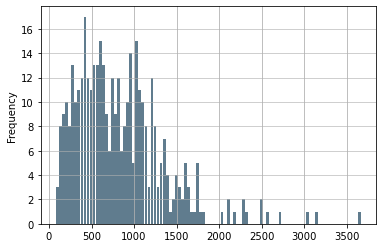

In [16]:
# 看讚數的分佈 y 軸是該讚數的貼文數 來看我們要怎麼取哪個讚數區間資料
commutes = fei_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [17]:
temp = fei_post[(fei_post['like_count'] <= 1500) & (fei_post['like_count'] > 500)] #讚數大於500 小於1000才取 : 201  篇文章
temp

,new_date,message,jieba_results,like_count
119,2019-04-14,為了選舉製造恐慌，民進黨才是真正的『恐怖分子』\n\n民進黨為了選舉操作精神錯亂，在野和執政兩套標準。李毅來發表演說，他的主張我們不能接受，但我們是言論自由的國家。蘇貞昌說他是「恐怖分子」，結果被踢爆這個「恐怖分子」原來2017年也拜訪過民進黨中央。\n\n真相被揭穿後，竟然繼續騙！丁允恭說，李毅當時是在黨部以外的地點進行交流。但李毅分明就是在民進黨黨部內。民進黨換了位子換了腦袋，刻意製造恐慌，才是真正的「恐怖分子」\n\n常痛批大陸武統的范世平，也被發現2年前竟也跟李毅見面，雙方還親切合照摟肩。民進黨跟側翼一邊罵大陸，一邊又跟他們口中、「恐怖分子」見面，這不是自相矛盾？\n\n在野和執政兩套價值標準，前後不一，為了選舉操作精神錯亂，照民進黨現在的標準，他們前兩年就是在賣台！\n\n民進黨要對國人清楚交代2017年和李毅的談話內容，為什麼當時不將李毅驅逐出境？\n\n#民進黨\n#李毅\n#恐怖份子\n\nhttps://newtalk.tw/news/view/2019-04-13/232980,為 了 選舉 製造 恐慌 民進黨 才 是 真正 的 恐怖分子 民進黨 為 了 選舉 操作 精神 錯亂 在野 和 執政 兩套 標準 李毅來 發 表演 說 他 的 主張 我們 不能 接受 但 我們 是 言論 自由 的 國家 蘇貞昌 說 他 是 恐怖分子 結果 被 踢爆 這個 恐怖分子 原來 年 也 拜 訪過 民進黨 中 央 真相 被 揭穿 後 竟然 繼續 騙 丁允恭說 李毅 當時 是 在 黨部 以外 的 地點 進行 交流 但 李毅 分明 就是 在 民進黨 黨部 內 民進黨 換了 位子 換了 腦袋 刻意 製造 恐慌 才 是 真正 的 恐怖分子 常痛 批大陸 武統 的 范世平 也 被 發現 年前 竟 也 跟 李毅 見面 雙方 還親 切合 照 摟 肩 民進黨 跟 側翼 一邊 罵 大陸 一邊 又 跟 他們 口中 恐怖分子 見面 這 不是 自相矛盾 在野 和 執政 兩套 價值 標準 前後不一 為 了 選舉 操作 精神 錯亂 照 民進黨 現在 的 標準 他們 前 兩年 就是 在 賣 台 民進黨 要 對 國人 清楚 交代 年 和 李毅 的 談話 內容 為 什麼 當時 不將 李毅 驅 逐出 境 民進黨 李毅 恐怖份子,504
120,2019-03-22,黨內初選再忙，週末在市場都還是和您有約\n\n【整個城市都是我的服務處】\n\n2019.03.23（六）0930-1130 復盛區民活動中心（市民大道5段99之3號）\n\n2019.03.24（日）0930-1130 福德市場（福德街225號）\n.\n歡迎給我們指教、建議...\n\n#初選民調_唯一支持 費鴻泰\n#不忘拜託您支持\n#費鴻泰\n#市場服務\n#松山區 #信義區 #松山信義\n#韓流 #韓國瑜 #KMT,黨內初選 再 忙 週末 在 市場 都 還是 和 您 有 約 整個 城市 都 是 我 的 服務處 六 復 盛區民 活動 中心 市民 大道 段 之 號 日 福德 市場 福德街 號 歡迎給 我們 指教 建議 初選 民調 唯一 支持 費鴻泰 不 忘 拜託 您 支持 費鴻泰 市場 服務 松山 區 信義區 松山 信義 韓流 韓國瑜,507
121,2019-12-16,「毀憲亂政」這就是民進黨守護國家的方式？\n 蔡英文最近在出席造勢活動時，宣布「12月31日，一定通過反滲透法」，不禁更讓外界懷疑，究竟民進黨這麼倉促立法。最近費鴻泰到地方辦社區活動，有不少朋友向費鴻泰反應：「民進黨是在著急什麼？」\n 從「民主進步」觀點看，民進黨執政以來的風格應該更接近「鴨霸專政」；無論民意反彈、學者質疑，民進黨就是要強推反滲透法，根本不管此惡法對人民的嚴重影響。\n 費鴻泰過去已經多次指出，反滲透法恐將侵害人民的基本權利，讓我國走向極端的麥卡錫主義。馬前總統辦公室也發布聲明警告，反滲透法影響重大，應該要經行政院提案、各部會討論後，才能正式提出；只有民進黨版，嚴重違反憲政常軌。但是，無論外界如何提醒告誡，蔡英文和民進黨都要蠻幹，反滲透法硬推的態度絲毫沒有改變。費鴻泰呼籲，要阻止人民的權利遭到侵害，就一定要下架民進黨，才能阻止這種毀憲亂政的惡法。\n\n#反滲透法#蔡英文#下架#民進黨#毀憲亂政,毀憲亂政 這 就是 民進黨 守護 國家 的 方式 蔡英文 最近 在 出席 造勢 活動 時 宣布 月 日 一定 通過 反滲透法 不禁 更 讓 外界 懷疑 究竟 民進黨 這麼 倉促 立法 最近 費鴻泰到 地方 辦 社區 活動 有 不少 朋友 向 費鴻泰 反應 民進黨 是 在 著急 什麼 從 民主 進步 觀點 看 民進黨 執政以 來 的 風格 應該 更 接近 鴨霸 專政 無論 民意 反彈 學者 質疑 民進黨 就是 要強 推 反滲透法 根本 不管 此惡法 對 人民 的 嚴 重影 響 費鴻泰過 去 已經 多次 指出 反滲透法 恐將 侵害 人民 的 基本 權利 讓 我國 走向 極 端的 麥卡錫主義 馬 前 總統 辦公室 也 發布 聲明 警告 反滲透法 影響 重大 應該 要經 行政院 提案 各部 會 討論 後 才能 正式 提出 只有 民進黨 版 嚴重 違反 憲政常軌 但是 無論 外界 如何 提醒 告誡 蔡英文 和 民進黨 都 要 蠻 幹 反滲透法 硬推 的 態度 絲毫 沒有 改變 費鴻泰 呼籲 要 阻止 人民 的 權利 遭到 侵害 就 一定 要 下架 民進黨 才能 阻止 這種 毀憲亂政 的 惡法 反滲透法 蔡英文 下架 民進黨 毀憲亂政,508
122,2020-01-07,❤️費鴻泰9大政見，向您報告：\n1. 提高教育預算，降低學雜費，減輕學生家長負擔。\n2.要求建構完善長照體系與提高賦稅優惠，支持長照家庭。\n3.增加公共化托育預算，倡議友善生育環境。\n4.力爭年金改革重新修法，維護軍公教應有尊嚴。\n5.力推「自由經濟示範區」，振興投資與經營環境。\n6.強化新創企業孵化器，並與在地產業結合。\n7. 力求建立酒駕、毒品零容忍的安全社會。\n8.減稅全民化。\n9.推動長照保險制，健全長照財源永續。,❤ 費鴻泰 大政 見 向 您 報告 提高 教育 預算 降低 學雜費 減輕學 生家長 負擔 要求 建構 完善 長照 體系 與 提高 賦稅 優惠 支持 長照 家庭 增加 公共 化托育 預算 倡議 友善 生育 環境 力爭 年金改革 重新 修法 維護 軍 公教 應有 尊嚴 力推 自由 經濟示 範區 振興 投資 與 經營 環境 強化 新 創企業 孵化器 並與 在地產業 結合 力求 建立 酒駕 毒品 零容忍 的 安全 社會 減稅 全民 化 推動 長照保險 制 健全 長照 財源 永續,510
123,2019-01-27,接力送暖 溫暖松信\n\n寒冬冷冽，趁著年節，我和秦慧珠議員，分別結合民間在地的資源，接力關懷松信的弱勢家庭、與長輩們，希望大家都能溫暖過年～\n\n昨天下午，我、曾銘宗委員和會計師公會，前往大我單身宿舍，發送白米更向單身、清苦的前輩拜年，也結合松信各里辦公處關懷里內弱勢家庭。\n\n秦慧珠議員，今天也接力舉行大型的公益園遊會、發送物資。\n\n松山信義，就是有愛。\n拋磚引玉，希望我和慧珠議員這樣的暖心活動能提醒你我，對周圍的朋友注入更多的關懷。,接力 送暖 溫暖松信 寒冬 冷冽 趁著 年節 我 和 秦慧珠 議員 分別 結合民間 在 地 的 資源 接力 關懷松信 的 弱勢 家庭 與 長輩 們 希望 大家 都 能 溫暖過 年 昨天下午 我 曾銘宗 委員 和 會 計師 公會 前往 大 我 單身 宿舍 發送 白米 更 向 單身 清苦 的 前輩 拜年 也 結合 松信 各里 辦公處 關懷里 內 弱勢 家庭 秦慧珠 議員 今天 也 接力 舉行 大型 的 公益 園遊會 發送 物資 松山 信義 就是 有 愛 拋磚 引玉 希望 我 和慧珠 議員 這樣 的 暖 心 活動 能 提醒 你 我 對 周圍 的 朋友 注入 更 多 的 關懷,511
...,...,...,...,...
355,2019-08-07,費鴻泰、王怡心㊗️福\n「七夕情人節快樂」,費鴻泰 王怡心 ㊗ 福 七夕 情人 節快 樂 」,1434
356,2019-02-21,❤️每一年的今天，鴻泰都奉上生日蛋糕給怡心，祝福「生日快樂、天天開心」❤️,❤ 每 一年 的 今天 鴻 泰 都 奉 上 生日蛋糕 給怡心 祝福 生日 快樂 天天 開心 ❤,1450
357,2019-04-10,民進黨立院護航，貪汙扁容光煥發\n\n費鴻泰強烈呼籲：「我們絕對不能再讓民進黨執政下去！票投民進黨，就是支持陳水扁，就是支持貪汙！」\n\n陳水扁在他的粉專新勇哥物語PO出一張與三名年輕女生對著鏡子自拍的合照，看起來容光煥發，手也不抖了，笑得很得意、很開心。一位前總統貪汙了幾億元，國際認證的貪汙犯，仍有法務部包庇、民進黨幾十名立委力挺，自認可以隻手遮天。陳水扁當然得意洋洋，當然神采奕奕！\n\n時值民進黨總統初選協調關鍵期，陳水扁昨日（４月９日）在粉專新勇哥物語發文，質疑蔡英文「抗壓性與自信心哪裡去了？」打定主意就是要挺賴清德，正因為蔡英文遲遲沒有鬆口特赦陳水扁。然而，賴清德則在與館長直播時談到，他認為陳水扁的判決有失公平，「任何人碰到這種事，都應該說句公道話」，顯然打算特赦陳水扁。\n\n現在陳水扁仍只是申請保外就醫中，只要政黨輪替，沒有法務部的包庇，沒有數量優勢的民進黨立委護航，他就得再回監獄。

TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [18]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [19]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [20]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一一,一上台,一下,一下子,一中,一中各表,一乾二淨,一事,一些,一人,...,黨營,黨產,黨部,鼓勵,鼓舞,齊力,齊心,齊聚,龍介仙,龜速
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.145435,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=7, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['政府', '我們', '大家', '蔡政府', '服務', '市場', '總統', '民進黨', '蔡英文', '費鴻泰']
TOP 10 WORDS PER TOPIC #1
['萬元', '事情', '我們', '立委', '李進勇', '明文', '網路', '蔡政府', '費鴻泰', '日本']
TOP 10 WORDS PER TOPIC #2
['蔡英文', '可以', '蘇貞昌', '總統', '國民黨', '扣除', '人民', '政府', '民進黨', '費鴻泰']
TOP 10 WORDS PER TOPIC #3
['人民', '政府', '蔡政府', '政治', '總統', '服務', '費鴻泰', '蔡英文', '中華民國', '民進黨']
TOP 10 WORDS PER TOPIC #4
['台北市', '國家', '觀光', '問題', '政策', '地方', '費鴻泰', '蔡政府', '政府', '印花']
TOP 10 WORDS PER TOPIC #5
['創意', '就是', '社區', '可以', '活動', '水扁', '蔡英文', '費鴻泰', '民進黨', '總統']
TOP 10 WORDS PER TOPIC #6
['現在', '自己', '人民', '我們', '國民黨', '政府', '就是', '議員', '費鴻泰', '民進黨']


In [22]:

LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['費鴻泰', '蔡英文', '糖果', '創意', '臺灣', '政府', '社區', '活動', '民進黨', '總統']
TOP 10 WORDS PER TOPIC #1
['政府', '公投', '中選會', '台灣', '費鴻泰', '大法官', '總統', '民主', '蔡英文', '民進黨']
TOP 10 WORDS PER TOPIC #2
['掃街', '號費鴻泰', '公費', '台北市', '身分', '加油', '柯文哲', '印花', '費鴻泰', '陳菊']
TOP 10 WORDS PER TOPIC #3
['蔡政府', '柯文哲', '外交', '林口', '日本', '軍歌', '水扁', '民進黨', '總統', '蔡英文']
TOP 10 WORDS PER TOPIC #4
['小孩', '買票', '感謝', '路口', '中華民國', '升旗', '權益', '政策', '水扁', '民進黨']
TOP 10 WORDS PER TOPIC #5
['七夕', '檔案', '億元', '日本', '感謝', '謝長廷', '費鴻泰', '祝福', '快樂', '水扁']
TOP 10 WORDS PER TOPIC #6
['我們', '議員', '蔡英文', '大家', '韓國瑜', '松山', '市場', '民進黨', '服務', '費鴻泰']


In [23]:
#政見做斷詞

politics_fei = politics[politics.姓名 == "費鴻泰"].政見.to_string()
politics_fei = re.sub(re_punctuation, "", politics_fei)
politics_fei = re.sub(r'[0-9]','',politics_fei)
politics_fei = re.sub(r'[a-zA-Z]','',politics_fei)
politics_fei = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',politics_fei)  # 注意裡面不能有空白！
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_fei, cut_all = False)


In [24]:
# 比較、查看他政見
promise = politics[politics.姓名 == "費鴻泰"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['7    1.推動青年創業的優惠融資，以及輔導青年就業等措施',
 '2.建立合理的薪資與工時制度',
 '3.建構完善長照體系，邁向健康、安全、幸福的高齡社會',
 '4.推動食品安全聯合稽查，與食品安全監測，維護國人飲食安全',
 '5.推動全面性住宅政策，含租金補貼及社會住宅，落實居住正義',
 '6.推動對身心障礙者的全面性照顧服務，保障其權益',
 '7.消除各種歧視婦女的限制，建立性別平等的友善社會',
 '8.推動民間擴大參與公共建設，增加就業機會',
 '9.推動資訊基本法，建構中央與地方便民服務單一窗口',
 '10.推動完備防疫體系，強化傳染病預警與風險管控機制',
 '11.推動積極性社會救助措施，結合企業與民間力量，落實對各個弱勢族群與家庭的照護',
 '12.推動醫療糾紛處理及醫療事故補償制度，強化醫療照護品質。']

In [25]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_fei, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)


In [26]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(words)  
word = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=6, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [p_vectorizer.get_feature_names()[index] for index in topic.argsort()[-8:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)


TOP 10 WORDS PER TOPIC #0
['擴大', '企業', '限制', '預警', '建立', '建構', '社會', '醫療']
TOP 10 WORDS PER TOPIC #1
['各個', '薪資', '維護', '飲食', '力量', '就業機會', '參與', '結合']
TOP 10 WORDS PER TOPIC #2
['完備', '合理', '性別', '租金', '地方', '平等', '強化', '推動']
TOP 10 WORDS PER TOPIC #3
['增加', '消除', '中央', '歧視婦女', '青年創業', '弱勢', '照護', '全面性']
TOP 10 WORDS PER TOPIC #4
['資訊基本法', '友善', '單一', '品質', '青年就業', '風險', '落實', '安全']
TOP 10 WORDS PER TOPIC #5
['工時制度', '積極性', '管控', '體系', '服務', '民間', '食品安全', '措施']


In [27]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

擴大, 企業, 限制, 預警, 建立, 建構, 社會, 醫療, 各個, 薪資, 維護, 飲食, 力量, 就業機會, 參與, 結合, 完備, 合理, 性別, 租金, 地方, 平等, 強化, 推動, 增加, 消除, 中央, 歧視婦女, 青年創業, 弱勢, 照護, 全面性, 資訊基本法, 友善, 單一, 品質, 青年就業, 風險, 落實, 安全, 工時制度, 積極性, 管控, 體系, 服務, 民間, 食品安全, 措施, 

In [28]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#產業升級、園區、高科技園區、加工區 、楠梓、交通、三鐵同構

Counter({'擴大': 1,
         '企業': 1,
         '限制': 1,
         '預警': 1,
         '建立': 1,
         '建構': 1,
         '社會': 1,
         '醫療': 1,
         '各個': 1,
         '薪資': 1,
         '維護': 1,
         '飲食': 1,
         '力量': 1,
         '就業機會': 1,
         '參與': 1,
         '結合': 1,
         '完備': 1,
         '合理': 1,
         '性別': 1,
         '租金': 1,
         '地方': 2,
         '平等': 1,
         '強化': 1,
         '推動': 1,
         '增加': 1,
         '消除': 1,
         '中央': 1,
         '歧視婦女': 1,
         '青年創業': 1,
         '弱勢': 1,
         '照護': 1,
         '全面性': 1,
         '資訊基本法': 1,
         '友善': 1,
         '單一': 1,
         '品質': 1,
         '青年就業': 1,
         '風險': 1,
         '落實': 1,
         '安全': 1,
         '工時制度': 1,
         '積極性': 1,
         '管控': 1,
         '體系': 1,
         '服務': 3,
         '民間': 1,
         '食品安全': 1,
         '措施': 1,
         '政府': 5,
         '我們': 3,
         '大家': 1,
         '蔡政府': 4,
         '市場': 1,
         '總統': 4,
         '

我們可以用 臉書貼文和政見 Topic word 的交集 會推測
劉世芳的幾個重點
1. 經濟相關的科技 園區和加工區
    - 高科技、發展、產業、加工區、園區、產業、就業、計畫、建設、
2. 楠梓地區
    -楠梓
3. 交通
    -三鐵同構、中油、交通、
4. 環境
    -環境、綠能、

職災 相關tf idf 高 (以下討論臉書貼文)

In [29]:
top_10_message = tfidf_view.sort_values(by = ['國民黨'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['國民黨'], ascending = False).head(10)

,一一,一上台,一下,一下子,一中,一中各表,一乾二淨,一事,一些,一人,...,黨營,黨產,黨部,鼓勵,鼓舞,齊力,齊心,齊聚,龍介仙,龜速
180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066181,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[180,]).sort_values(by = 180, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,180
整合,0.198880
會面,0.198880
國民黨,0.187432
民心,0.184966
自我,0.175095
...,...
實績,0.000000
實用性,0.000000
實現,0.000000
實無法,0.000000


In [31]:
top_10_message = tfidf_view.sort_values(by = ['韓國瑜'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['韓國瑜'], ascending = False).head(10)

,一一,一上台,一下,一下子,一中,一中各表,一乾二淨,一事,一些,一人,...,黨營,黨產,黨部,鼓勵,鼓舞,齊力,齊心,齊聚,龍介仙,龜速
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047492,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.162939,0.0
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.110738,0.0,0.0,0.0,0.0,0.069543,0.0
177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [32]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[63,]).sort_values(by = 63, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,63
韓國瑜,0.379328
媽祖,0.184183
團結,0.179040
慈祐宮,0.174353
助選,0.174353
...,...
實習生,0.000000
實績,0.000000
實用性,0.000000
實現,0.000000


In [33]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[120,]).sort_values(by = 120, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,120
農委會,0.348668
韓國瑜,0.329181
高雄貓,0.229143
貓熊,0.229143
保育,0.229143
...,...
實在令,0.000000
實在,0.000000
實務上,0.000000
實力強,0.000000


In [34]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[86,]).sort_values(by = 86, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,86
穿雲箭,0.480384
相見,0.480384
松信,0.412144
費鴻,0.394195
泰和,0.372227
...,...
寒蟬,0.000000
寒暑,0.000000
寒意,0.000000
寒冬,0.000000


In [35]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[160,]).sort_values(by = 160, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,160
慈祐宮,0.422732
庶民,0.422732
松山,0.322740
富民,0.240078
韓國瑜,0.229927
...,...
實力強,0.000000
實力,0.000000
實事,0.000000
寡不敵眾,0.000000


In [36]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[82,]).sort_values(by = 82, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,82
民宿,0.420881
禮拜,0.413398
宮廟,0.280587
上班,0.195718
總統,0.193524
...,...
實驗,0.000000
實際狀況,0.000000
實際,0.000000
實銷,0.000000


In [37]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[203,]).sort_values(by = 203, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,203
競選總部,0.181801
鄉親,0.164782
力挺,0.151875
轉晴,0.149548
新北漢子,0.149548
...,...
實銷,0.000000
實進,0.000000
實質,0.000000
實話,0.000000


In [38]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[162,]).sort_values(by = 162, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,162
穿雲箭,0.480384
相見,0.480384
松信,0.412144
費鴻,0.394195
泰和,0.372227
...,...
寒蟬,0.000000
寒暑,0.000000
寒意,0.000000
寒冬,0.000000


In [39]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[228,]).sort_values(by = 228, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,228
總統,0.315277
韓市長,0.245621
友邦,0.177767
陳其邁,0.177767
乾脆,0.177767
...,...
實際狀況,0.000000
實際,0.000000
實銷,0.000000
實進,0.000000


In [40]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[88,]).sort_values(by = 88, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,88
快來,0.325879
加油,0.247329
聚聚,0.175196
四川,0.175196
敬請,0.175196
...,...
實務上,0.000000
實力強,0.000000
實力,0.000000
實事,0.000000


In [41]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[177,]).sort_values(by = 177, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,177
公費,0.571882
陳菊,0.435093
很爽,0.285941
很明顯,0.285941
自費,0.285941
...,...
寡不敵眾,0.000000
寒蟬,0.000000
寒暑,0.000000
寒意,0.000000


In [62]:
temp.iloc[86,]

new_date                        2019-11-18
message               松信穿雲箭\n韓國瑜、費鴻泰和您來相見1
jieba_results     松信 穿雲箭 韓國瑜 費鴻 泰和 您 來 相見 
like_count                             770
topic                                    6
Name: 205, dtype: object

In [63]:
temp.iloc[162,]

new_date                        2019-11-18
message               松信穿雲箭\n韓國瑜、費鴻泰和您來相見2
jieba_results     松信 穿雲箭 韓國瑜 費鴻 泰和 您 來 相見 
like_count                            1044
topic                                    6
Name: 281, dtype: object

In [42]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

221      台獨
222      還行
223      水扁
224      核四
225     自經區
226      加油
227      農產
228      總統
229     蘇貞昌
230      講錯
231     陳明通
232     王鴻薇
233     張雲鵬
234    九二共識
235     謝長廷
236      七夕
237    生日蛋糕
238      水扁
239      服務
240     林佳龍
Name: term, dtype: object

In [43]:
#假如以剛剛科學園區相關主題為例 想看tfidf 最高的詞是科學園區的文章
message_newtfidf[message_newtfidf['term']=="九二共識"]

,一一,一上台,一下,一下子,一中,一中各表,一乾二淨,一事,一些,一人,...,黨產,黨部,鼓勵,鼓舞,齊力,齊心,齊聚,龍介仙,龜速,term
234,0.0,0.0,0.0,0.0,0.0,0.231123,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,九二共識


In [44]:
# 會發現文章出現tfidf是產業的很少，很正常 因為出現太多反而tfidf不會高！
temp.iloc[234,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                               2019-03-30
message                                                                                    費鴻泰等五位委員大聲叱咋民進黨政府：「卡韓卡經濟，卡死臺灣大未來。」\n\n費鴻泰和曾銘宗、賴士葆、林德福、黃昭順委員，29日共同在國民黨團辦公室舉行記者會，強烈指責民進黨政府的作法是「逢韓必反」，完全漠視韓市長為高雄拚經濟的努力。\n\n高雄市長韓國瑜於港澳大陸城市交流後，為高雄帶回很多大訂單，卻被民進黨政府批賣台。韓市長清楚地表示：「臺灣人民現在誰能接受一國兩制？九二共識是一中各表，希望外界不要扣他帽子」。\n\n九二共識一中各表，這是國民黨的共識，從來不曾動搖。民進黨混淆視聽的能力真的很強，直指九二共識等於一國兩制。民進黨刻意散播這個謠言，就是民進黨設的一國兩制陷阱。\n\n# 韓國瑜\n# 臺灣\n# 高雄\n# 民進黨\n# 九二共識
jieba_results     費鴻泰 等 五位 委員 大聲 叱 咋 民進黨 政府 卡 韓卡 經濟 卡死 臺灣 大未來  費鴻 泰和 曾銘宗 賴士葆 林 德福 黃昭順 委員  日 共同 在 國民黨團 辦公室 舉行 記者會 強烈 指責 民進黨 政府 的 作法 是 逢 韓必 反 完全 漠視 韓市長 為 高雄 拚 經濟 的 努力

來看楠梓 ： 在臉書發文的topic中topic2,4,7 出現很多次楠梓 

In [45]:
message_newtfidf[message_newtfidf['term']=="蔡英文"]

,一一,一上台,一下,一下子,一中,一中各表,一乾二淨,一事,一些,一人,...,黨產,黨部,鼓勵,鼓舞,齊力,齊心,齊聚,龍介仙,龜速,term
64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,蔡英文
121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,蔡英文
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,蔡英文
184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,蔡英文


In [46]:
temp.iloc[64,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      2019-06-09
message                                                                                                                                                                 蔡英文的誠信，連陳水扁都質疑\n\n       面對賴清德挑戰總統大位，蔡英文表面一副信心滿滿的樣子，檯面下卻讓民進黨中執會修改初選辦法，也難怪巴望著賴清德特赦的陳水扁直跳腳。費鴻泰認為，蔡英文沒有誠信也不是一天兩天了，蔡英文上台後修改

In [47]:
temp.iloc[121,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  2019-07-07
message                                                                                                                     以國安為由擴張權力，蔡英文如同袁世凱\n\n       昨日費鴻泰才說蔡英文提出「中共代理人」修法，就是她走向專制的最後一哩路。蔡英文面對媒體提問，又用「國安」作為藉口合理化她的綠色恐怖陰謀。蔡英文如今就是要動用輿論與政府內的東廠如NCC、陸委會等，打壓所有不順她心意、說出民進黨陰謀的組織與個人，如同當年袁世凱一樣，假借國家安定為藉口，其實就是要搞專制。\n        大家今天下午到凱道表達要爭取民主自由，要蔡政府把公投還給人民，一起站出來反「鐵籠公投」。蔡英文口口聲聲說台灣是民主社會，必須保障言論自由，又用國家安全為由打壓言論自由，什麼言論享有自由？什麼言論沒有？全部都是她說了算！\n       民進黨一直以來都在將反對者貼上「紅色」標

In [48]:
temp.iloc[151,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            2019-04-27
message                                                         蔡英文口號治國，參加廢核遊行給誰看？\n\n         松山慈祐宮今 (27) 是媽祖的誕辰，費鴻泰ㄧ早就到慈祐宮參拜，祈求媽祖保佑大家健康、國泰民安。今天上午總統蔡英文也親自到慈祐宮祝壽，蔡英文表示：「作為總統的我，也一定會跟隨媽祖的精神，守護我們的國家，讓人民安居樂業。」\n         但是，蔡英文在昨晚透過臉書預告，她將會參與廢核大遊行。前環保署長魏國彥認為，蔡英文何不直接下令停止核能發電，這樣最快，何必上街頭呢？\n         夏日將來臨，費鴻泰日前發文警告，用電高峰期將至，蔡英文卻還把缺電當作謠言處理。蔡英文把民意跟民生都放一邊，要參加「廢核大遊行」，為了意識形態主張，執政者上街遊行，還是要表演給誰看？\n         蔡英文如同就是一位口號治國的總統，嚷嚷半天，搞到自己上街頭抗議，真不知道是要向誰抗議？抗議自己

In [49]:
temp.iloc[184,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     2019-07-01
message                                                                                                                                              蔡英文扼殺民主，連綠營都恐懼\n      \n       蔡英文用「轉型正義」、「國家安全」兩套說詞來實現自己專制的藉口。並沒有人反對「轉型正義」或是「國家安全」，但現在民進黨廣設東廠，強推大法官，這些都變成了蔡英文的工具，連綠營的人都感到恐懼。\n          柯文哲認為蔡英文把國家安全當晃子，柯表示：「她想怎麼用就怎麼解釋，這是我不喜歡的地方，沒有人說國家安

In [50]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['費鴻泰', '蔡英文', '糖果', '創意', '臺灣', '政府', '社區', '活動', '民進黨', '總統']
TOP 10 WORDS PER TOPIC #1
['政府', '公投', '中選會', '台灣', '費鴻泰', '大法官', '總統', '民主', '蔡英文', '民進黨']
TOP 10 WORDS PER TOPIC #2
['掃街', '號費鴻泰', '公費', '台北市', '身分', '加油', '柯文哲', '印花', '費鴻泰', '陳菊']
TOP 10 WORDS PER TOPIC #3
['蔡政府', '柯文哲', '外交', '林口', '日本', '軍歌', '水扁', '民進黨', '總統', '蔡英文']
TOP 10 WORDS PER TOPIC #4
['小孩', '買票', '感謝', '路口', '中華民國', '升旗', '權益', '政策', '水扁', '民進黨']
TOP 10 WORDS PER TOPIC #5
['七夕', '檔案', '億元', '日本', '感謝', '謝長廷', '費鴻泰', '祝福', '快樂', '水扁']
TOP 10 WORDS PER TOPIC #6
['我們', '議員', '蔡英文', '大家', '韓國瑜', '松山', '市場', '民進黨', '服務', '費鴻泰']


In [51]:
#可以猜猜看第一篇文是哪個topic 
temp.iloc[:,[0,2]]

,new_date,jieba_results
119,2019-04-14,為 了 選舉 製造 恐慌 民進黨 才 是 真正 的 恐怖分子 民進黨 為 了 選舉 操作 精神 錯亂 在野 和 執政 兩套 標準 李毅來 發 表演 說 他 的 主張 我們 不能 接受 但 我們 是 言論 自由 的 國家 蘇貞昌 說 他 是 恐怖分子 結果 被 踢爆 這個 恐怖分子 原來 年 也 拜 訪過 民進黨 中 央 真相 被 揭穿 後 竟然 繼續 騙 丁允恭說 李毅 當時 是 在 黨部 以外 的 地點 進行 交流 但 李毅 分明 就是 在 民進黨 黨部 內 民進黨 換了 位子 換了 腦袋 刻意 製造 恐慌 才 是 真正 的 恐怖分子 常痛 批大陸 武統 的 范世平 也 被 發現 年前 竟 也 跟 李毅 見面 雙方 還親 切合 照 摟 肩 民進黨 跟 側翼 一邊 罵 大陸 一邊 又 跟 他們 口中 恐怖分子 見面 這 不是 自相矛盾 在野 和 執政 兩套 價值 標準 前後不一 為 了 選舉 操作 精神 錯亂 照 民進黨 現在 的 標準 他們 前 兩年 就是 在 賣 台 民進黨 要 對 國人 清楚 交代 年 和 李毅 的 談話 內容 為 什麼 當時 不將 李毅 驅 逐出 境 民進黨 李毅 恐怖份子
120,2019-03-22,黨內初選 再 忙 週末 在 市場 都 還是 和 您 有 約 整個 城市 都 是 我 的 服務處 六 復 盛區民 活動 中心 市民 大道 段 之 號 日 福德 市場 福德街 號 歡迎給 我們 指教 建議 初選 民調 唯一 支持 費鴻泰 不 忘 拜託 您 支持 費鴻泰 市場 服務 松山 區 信義區 松山 信義 韓流 韓國瑜
121,2019-12-16,毀憲亂政 這 就是 民進黨 守護 國家 的 方式 蔡英文 最近 在 出席 造勢 活動 時 宣布 月 日 一定 通過 反滲透法 不禁 更 讓 外界 懷疑 究竟 民進黨 這麼 倉促 立法 最近 費鴻泰到 地方 辦 社區 活動 有 不少 朋友 向 費鴻泰 反應 民進黨 是 在 著急 什麼 從 民主 進步 觀點 看 民進黨 執政以 來 的 風格 應該 更 接近 鴨霸 專政 無論 民意 反彈 學者 質疑 民進黨 就是 要強 推 反滲透法 根本 不管 此惡法 對 人民 的 嚴 重影 響 費鴻泰過 去 已經 多次 指出 反滲透法 恐將 侵害 人民 的 基本 權利 讓 我國 走向 極 端的 麥卡錫主義 馬 前 總統 辦公室 也 發布 聲明 警告 反滲透法 影響 重大 應該 要經 行政院 提案 各部 會 討論 後 才能 正式 提出 只有 民進黨 版 嚴重 違反 憲政常軌 但是 無論 外界 如何 提醒 告誡 蔡英文 和 民進黨 都 要 蠻 幹 反滲透法 硬推 的 態度 絲毫 沒有 改變 費鴻泰 呼籲 要 阻止 人民 的 權利 遭到 侵害 就 一定 要 下架 民進黨 才能 阻止 這種 毀憲亂政 的 惡法 反滲透法 蔡英文 下架 民進黨 毀憲亂政
122,2020-01-07,❤ 費鴻泰 大政 見 向 您 報告 提高 教育 預算 降低 學雜費 減輕學 生家長 負擔 要求 建構 完善 長照 體系 與 提高 賦稅 優惠 支持 長照 家庭 增加 公共 化托育 預算 倡議 友善 生育 環境 力爭 年金改革 重新 修法 維護 軍 公教 應有 尊嚴 力推 自由 經濟示 範區 振興 投資 與 經營 環境 強化 新 創企業 孵化器 並與 在地產業 結合 力求 建立 酒駕 毒品 零容忍 的 安全 社會 減稅 全民 化 推動 長照保險 制 健全 長照 財源 永續
123,2019-01-27,接力 送暖 溫暖松信 寒冬 冷冽 趁著 年節 我 和 秦慧珠 議員 分別 結合民間 在 地 的 資源 接力 關懷松信 的 弱勢 家庭 與 長輩 們 希望 大家 都 能 溫暖過 年 昨天下午 我 曾銘宗 委員 和 會 計師 公會 前往 大 我 單身 宿舍 發送 白米 更 向 單身 清苦 的 前輩 拜年 也 結合 松信 各里 辦公處 關懷里 內 弱勢 家庭 秦慧珠 議員 今天 也 接力 舉行 大型 的 公益 園遊會 發送 物資 松山 信義 就是 有 愛 拋磚 引玉 希望 我 和慧珠 議員 這樣 的 暖 心 活動 能 提醒 你 我 對 周圍 的 朋友 注入 更 多 的 關懷
...,...,...
355,2019-08-07,費鴻泰 王怡心 ㊗ 福 七夕 情人 節快 樂 」
356,2019-02-21,❤ 每 一年 的 今天 鴻 泰 都 奉 上 生日蛋糕 給怡心 祝福 生日 快樂 天天 開心 ❤
357,2019-04-10,民進黨 立院 護航 貪汙 扁 容光 煥發 費鴻泰 強烈 呼籲 我們 絕對 不能 再 讓 民進黨 執政 下去 票 投 民進黨 就是 支持 陳 水扁 就是 支持 貪汙 陳 水扁 在 他 的 粉專 新勇哥 物語 出一張 與 三名 年輕 女生 對 著鏡子 自拍 的 合照 看起 來 容光 煥發 手 也 不抖 了 笑 得 很 得意 很 開心 一位 前 總統 貪汙 了 幾億元 國際 認證 的 貪汙 犯 仍有 法務部 包庇 民進黨 幾 十名 立委 力挺 自認 可以 隻 手 遮天 陳 水扁 當然 得意洋洋 當然 神采奕奕 時值 民進黨 總統初選 協調 關鍵期 陳 水扁 昨日 ４ 月 ９ 日 在 粉專 新勇哥 物語 發文 質疑 蔡英文 抗壓性 與 自信心 哪裡 去 了 打定主意 就是 要 挺 賴清德 正因 為 蔡英文 遲遲 沒 有 鬆 口 特赦 陳 水扁 然而 賴清德 則在 與 館長 直播 時談 到 他 認為 陳 水扁 的 判決 有失 公平 任何人 碰到 這種 事 都 應該 說 句 公道 話 顯然 打算 特赦 陳 水扁 現在 陳 水扁 仍 只是 申請 保外 就 醫中 只要 政黨 輪替 沒有 法務部 的 包庇 沒有 數量 優勢 的 民進黨 立委 護航 他 就 得 再 回 監獄 一旦 阿扁 獲得 特赦 就 再也 無法 讓 他 回 監獄 了 所以 陳 水扁 才 這樣 挺 賴清德 陳 水扁 蔡英文 賴清德 法務部 民進黨
358,2019-01-03,費鴻泰 徐巧 芯 本週 日 初 登場 市場 服務 全新 升級 版 號外 號外 年輕 活力 的 新科 議員 徐巧 芯 將與鴻泰 一起 走進 菜市 仔為民 服務 費鴻泰 徐巧 芯 世代 合作 的 市場 聯合 擺攤 服務 首映 會 本週 日 就 在 福德街 號 福德 市場 隆重 獻映 鴻泰週 六 日 都 是 在 各市 場擺攤 服務 零距離 協助民眾 解決問題 這樣 的 擺攤 服務 已歷 個 寒暑 也 是 全國 唯一 在 市場 擺攤 服務 的 立法委員 巧芯 議員 新 手上 路 卻 接地 氣 迫不及待 要 和 鴻 泰同 往市 場民 服務 這般 政壇 首見 的 世代 聯合 擺攤 服務 將會 在 菜市 仔內 擦 出 什麼樣 的 火花 走過 路過 可千萬 不要 錯過 日 福德 市場 福德街 號 專業 熱情 派 費鴻泰 年輕 活力 派 徐巧 芯 歡迎 大家 來尬 聊


In [52]:
#LDA classification 
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

<ipython-input-52-3dbfd841bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["topic"]=""#add new column
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,new_date,message,jieba_results,like_count,topic
119,2019-04-14,為了選舉製造恐慌，民進黨才是真正的『恐怖分子』\n\n民進黨為了選舉操作精神錯亂，在野和執政兩套標準。李毅來發表演說，他的主張我們不能接受，但我們是言論自由的國家。蘇貞昌說他是「恐怖分子」，結果被踢爆這個「恐怖分子」原來2017年也拜訪過民進黨中央。\n\n真相被揭穿後，竟然繼續騙！丁允恭說，李毅當時是在黨部以外的地點進行交流。但李毅分明就是在民進黨黨部內。民進黨換了位子換了腦袋，刻意製造恐慌，才是真正的「恐怖分子」\n\n常痛批大陸武統的范世平，也被發現2年前竟也跟李毅見面，雙方還親切合照摟肩。民進黨跟側翼一邊罵大陸，一邊又跟他們口中、「恐怖分子」見面，這不是自相矛盾？\n\n在野和執政兩套價值標準，前後不一，為了選舉操作精神錯亂，照民進黨現在的標準，他們前兩年就是在賣台！\n\n民進黨要對國人清楚交代2017年和李毅的談話內容，為什麼當時不將李毅驅逐出境？\n\n#民進黨\n#李毅\n#恐怖份子\n\nhttps://newtalk.tw/news/view/2019-04-13/232980,為 了 選舉 製造 恐慌 民進黨 才 是 真正 的 恐怖分子 民進黨 為 了 選舉 操作 精神 錯亂 在野 和 執政 兩套 標準 李毅來 發 表演 說 他 的 主張 我們 不能 接受 但 我們 是 言論 自由 的 國家 蘇貞昌 說 他 是 恐怖分子 結果 被 踢爆 這個 恐怖分子 原來 年 也 拜 訪過 民進黨 中 央 真相 被 揭穿 後 竟然 繼續 騙 丁允恭說 李毅 當時 是 在 黨部 以外 的 地點 進行 交流 但 李毅 分明 就是 在 民進黨 黨部 內 民進黨 換了 位子 換了 腦袋 刻意 製造 恐慌 才 是 真正 的 恐怖分子 常痛 批大陸 武統 的 范世平 也 被 發現 年前 竟 也 跟 李毅 見面 雙方 還親 切合 照 摟 肩 民進黨 跟 側翼 一邊 罵 大陸 一邊 又 跟 他們 口中 恐怖分子 見面 這 不是 自相矛盾 在野 和 執政 兩套 價值 標準 前後不一 為 了 選舉 操作 精神 錯亂 照 民進黨 現在 的 標準 他們 前 兩年 就是 在 賣 台 民進黨 要 對 國人 清楚 交代 年 和 李毅 的 談話 內容 為 什麼 當時 不將 李毅 驅 逐出 境 民進黨 李毅 恐怖份子,504,4
120,2019-03-22,黨內初選再忙，週末在市場都還是和您有約\n\n【整個城市都是我的服務處】\n\n2019.03.23（六）0930-1130 復盛區民活動中心（市民大道5段99之3號）\n\n2019.03.24（日）0930-1130 福德市場（福德街225號）\n.\n歡迎給我們指教、建議...\n\n#初選民調_唯一支持 費鴻泰\n#不忘拜託您支持\n#費鴻泰\n#市場服務\n#松山區 #信義區 #松山信義\n#韓流 #韓國瑜 #KMT,黨內初選 再 忙 週末 在 市場 都 還是 和 您 有 約 整個 城市 都 是 我 的 服務處 六 復 盛區民 活動 中心 市民 大道 段 之 號 日 福德 市場 福德街 號 歡迎給 我們 指教 建議 初選 民調 唯一 支持 費鴻泰 不 忘 拜託 您 支持 費鴻泰 市場 服務 松山 區 信義區 松山 信義 韓流 韓國瑜,507,6
121,2019-12-16,「毀憲亂政」這就是民進黨守護國家的方式？\n 蔡英文最近在出席造勢活動時，宣布「12月31日，一定通過反滲透法」，不禁更讓外界懷疑，究竟民進黨這麼倉促立法。最近費鴻泰到地方辦社區活動，有不少朋友向費鴻泰反應：「民進黨是在著急什麼？」\n 從「民主進步」觀點看，民進黨執政以來的風格應該更接近「鴨霸專政」；無論民意反彈、學者質疑，民進黨就是要強推反滲透法，根本不管此惡法對人民的嚴重影響。\n 費鴻泰過去已經多次指出，反滲透法恐將侵害人民的基本權利，讓我國走向極端的麥卡錫主義。馬前總統辦公室也發布聲明警告，反滲透法影響重大，應該要經行政院提案、各部會討論後，才能正式提出；只有民進黨版，嚴重違反憲政常軌。但是，無論外界如何提醒告誡，蔡英文和民進黨都要蠻幹，反滲透法硬推的態度絲毫沒有改變。費鴻泰呼籲，要阻止人民的權利遭到侵害，就一定要下架民進黨，才能阻止這種毀憲亂政的惡法。\n\n#反滲透法#蔡英文#下架#民進黨#毀憲亂政,毀憲亂政 這 就是 民進黨 守護 國家 的 方式 蔡英文 最近 在 出席 造勢 活動 時 宣布 月 日 一定 通過 反滲透法 不禁 更 讓 外界 懷疑 究竟 民進黨 這麼 倉促 立法 最近 費鴻泰到 地方 辦 社區 活動 有 不少 朋友 向 費鴻泰 反應 民進黨 是 在 著急 什麼 從 民主 進步 觀點 看 民進黨 執政以 來 的 風格 應該 更 接近 鴨霸 專政 無論 民意 反彈 學者 質疑 民進黨 就是 要強 推 反滲透法 根本 不管 此惡法 對 人民 的 嚴 重影 響 費鴻泰過 去 已經 多次 指出 反滲透法 恐將 侵害 人民 的 基本 權利 讓 我國 走向 極 端的 麥卡錫主義 馬 前 總統 辦公室 也 發布 聲明 警告 反滲透法 影響 重大 應該 要經 行政院 提案 各部 會 討論 後 才能 正式 提出 只有 民進黨 版 嚴重 違反 憲政常軌 但是 無論 外界 如何 提醒 告誡 蔡英文 和 民進黨 都 要 蠻 幹 反滲透法 硬推 的 態度 絲毫 沒有 改變 費鴻泰 呼籲 要 阻止 人民 的 權利 遭到 侵害 就 一定 要 下架 民進黨 才能 阻止 這種 毀憲亂政 的 惡法 反滲透法 蔡英文 下架 民進黨 毀憲亂政,508,6
122,2020-01-07,❤️費鴻泰9大政見，向您報告：\n1. 提高教育預算，降低學雜費，減輕學生家長負擔。\n2.要求建構完善長照體系與提高賦稅優惠，支持長照家庭。\n3.增加公共化托育預算，倡議友善生育環境。\n4.力爭年金改革重新修法，維護軍公教應有尊嚴。\n5.力推「自由經濟示範區」，振興投資與經營環境。\n6.強化新創企業孵化器，並與在地產業結合。\n7. 力求建立酒駕、毒品零容忍的安全社會。\n8.減稅全民化。\n9.推動長照保險制，健全長照財源永續。,❤ 費鴻泰 大政 見 向 您 報告 提高 教育 預算 降低 學雜費 減輕學 生家長 負擔 要求 建構 完善 長照 體系 與 提高 賦稅 優惠 支持 長照 家庭 增加 公共 化托育 預算 倡議 友善 生育 環境 力爭 年金改革 重新 修法 維護 軍 公教 應有 尊嚴 力推 自由 經濟示 範區 振興 投資 與 經營 環境 強化 新 創企業 孵化器 並與 在地產業 結合 力求 建立 酒駕 毒品 零容忍 的 安全 社會 減稅 全民 化 推動 長照保險 制 健全 長照 財源 永續,510,6
123,2019-01-27,接力送暖 溫暖松信\n\n寒冬冷冽，趁著年節，我和秦慧珠議員，分別結合民間在地的資源，接力關懷松信的弱勢家庭、與長輩們，希望大家都能溫暖過年～\n\n昨天下午，我、曾銘宗委員和會計師公會，前往大我單身宿舍，發送白米更向單身、清苦的前輩拜年，也結合松信各里辦公處關懷里內弱勢家庭。\n\n秦慧珠議員，今天也接力舉行大型的公益園遊會、發送物資。\n\n松山信義，就是有愛。\n拋磚引玉，希望我和慧珠議員這樣的暖心活動能提醒你我，對周圍的朋友注入更多的關懷。,接力 送暖 溫暖松信 寒冬 冷冽 趁著 年節 我 和 秦慧珠 議員 分別 結合民間 在 地 的 資源 接力 關懷松信 的 弱勢 家庭 與 長輩 們 希望 大家 都 能 溫暖過 年 昨天下午 我 曾銘宗 委員 和 會 計師 公會 前往 大 我 單身 宿舍 發送 白米 更 向 單身 清苦 的 前輩 拜年 也 結合 松信 各里 辦公處 關懷里 內 弱勢 家庭 秦慧珠 議員 今天 也 接力 舉行 大型 的 公益 園遊會 發送 物資 松山 信義 就是 有 愛 拋磚 引玉 希望 我 和慧珠 議員 這樣 的 暖 心 活動 能 提醒 你 我 對 周圍 的 朋友 注入 更 多 的 關懷,511,4
...,...,...,...,...,...
355,2019-08-07,費鴻泰、王怡心㊗️福\n「七夕情人節快樂」,費鴻泰 王怡心 ㊗ 福 七夕 情人 節快 樂 」,1434,5
356,2019-02-21,❤️每一年的今天，鴻泰都奉上生日蛋糕給怡心，祝福「生日快樂、天天開心」❤️,❤ 每 一年 的 今天 鴻 泰 都 奉 上 生日蛋糕 給怡心 祝福 生日 快樂 天天 開心 ❤,1450,5
357,2019-04-10,民進黨立院護航，貪汙扁容光煥發\n\n費鴻泰強烈呼籲：「我們絕對不能再讓民進黨執政下去！票投民進黨，就是支持陳水扁，就是支持貪汙！」\n\n陳水扁在他的粉專新勇哥物語PO出一張與三名年輕女生對著鏡子自拍的合照，看起來容光煥發，手也不抖了，笑得很得意、很開心。一位前總統貪汙了幾億元，國際認證的貪汙犯，仍有法務部包庇、民進黨幾十名立委力挺，自認可以隻手遮天。陳水扁當然得意洋洋，當然神采奕奕！\n\n時值民進黨總統初選協調關鍵期，陳水扁昨日（４月９日）在粉專新勇哥物語發文，質疑蔡英文「抗壓性與自信心哪裡去了？」打定主意就是要挺賴清德，正因為蔡英文遲遲沒有鬆口特赦陳水扁。然而，賴清德則在與館長直播時談到，他認為陳水扁的判決有失公平，「任何人碰到這種事，都應該說句公道話」，顯然打算特赦陳水扁。\n\n現在陳水扁仍只是申請保外就醫中，只要政黨輪替，沒有法務部的包庇

可以看到第19 貼文 真的是和topic5:服務 有關
        23貼文 也屬於topic4: 市場 相關

In [53]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 0,5,7 這些主題相關比較熱門

Counter({6: 6, 3: 5, 0: 2, 2: 1, 1: 1, 5: 5})

臉書發文的Topic 0,5,7比較常出現 
TOP 10 WORDS PER TOPIC #0
['高雄市', '大家', '一抹黑', '一天', '注意', '安全', '世芳', '朋友', '分享', '台灣']

TOP 10 WORDS PER TOPIC #5
['美國', '工程', '我們', '大雨', '改變', '提高', '國家', '自由', '發言', '台灣']

TOP 10 WORDS PER TOPIC #7
['經濟', '軍人節', '問好', '自由黃昏市場', '初選', '台灣', '市長', '楠梓', '我們', '韓市']

回去對政見做印證
政見Topic 
TOP 10 WORDS PER TOPIC #0
['東西', '共同', '安居樂業', '帶動', '文化', '強化', '保存', '交通', '政策', '推動']
TOP 10 WORDS PER TOPIC #1
['實現', '交流', '新綠園', '北上', '地方', '廣設', '升級', '結合', '規劃', '園區']
TOP 10 WORDS PER TOPIC #2
['家庭', '延續', '南遷', '宿舍', '檢討', '左楠', '綠能', '黨產處', '高科技', '開闢']
TOP 10 WORDS PER TOPIC #3
['廠區', '啟動', '移入', '聯外', '通過', '接國', '引入', '政黨', '功能', '盡速']
TOP 10 WORDS PER TOPIC #4
['整合', '區的', '道國', '中心', '打造', '重新', '楠梓', '正義', '形成', '總部']
TOP 10 WORDS PER TOPIC #5
['觀光', '活化', '朝向', '建立', '融入', '三鐵共構', '眷村', '自主', '發展', '中油']
TOP 10 WORDS PER TOPIC #6
['財稅', '追求', '照護', '人口', '就業', '安置', '新門戶', '生態', '社區', '轉型']
TOP 10 WORDS PER TOPIC #7
['持續', '環境', '十字', '打通', '生活', '台灣', '加工區', '防衛', '聚落', '產業']

楠梓在政見中有出現、且在臉書發文也出現不少次，可以互相對應，算是政見、發文互相有符合的詞
但是除了楠梓以外 其他政見比較少在發文中提到
且上次數字型資料分析結果，劉世芳讚數多的貼文言詞都比較有侵略性，內容多數在品評時事的過失，有點蹭時事熱度的感覺，臉書發文的目的比較不是以政見作為考量。

In [54]:
#politics_word
match_column = list(set(words).intersection(vectorizer.get_feature_names()))
match_column

['保障',
 '社會',
 '弱勢',
 '救助',
 '國人',
 '薪資',
 '醫療',
 '各個',
 '處理及',
 '增加',
 '事故',
 '參與',
 '強化',
 '糾紛',
 '制度',
 '各種',
 '防疫',
 '友善',
 '租金',
 '合理',
 '中央',
 '便民',
 '完善',
 '措施',
 '結合',
 '體系',
 '就業機會',
 '青年創業',
 '政策',
 '品質',
 '輔導',
 '聯合',
 '補貼',
 '幸福',
 '安全',
 '推動',
 '健康',
 '地方',
 '限制',
 '風險',
 '家庭',
 '服務',
 '建立',
 '企業',
 '力量',
 '維護',
 '機制',
 '照護',
 '照顧',
 '長照',
 '公共',
 '建設',
 '民間',
 '族群',
 '以及',
 '建構',
 '落實',
 '擴大']

In [55]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,一一,一上台,一下,一下子,一中,一中各表,一乾二淨,一事,一些,一人,...,黨營,黨產,黨部,鼓勵,鼓舞,齊力,齊心,齊聚,龍介仙,龜速
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[0,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  2019-04-14
message                                                                                      為了選舉製造恐慌，民進黨才是真正的『恐怖分子』\n\n民進黨為了選舉操作精神錯亂，在野和執政兩套標準。李毅來發表演說，他的主張我們不能接受，但我們是言論自由的國家。蘇貞昌說他是「恐怖分子」，結果被踢爆這個「恐怖分子」原來2017年也拜訪過民進黨中央。\n\n真相被揭穿後，竟然繼續騙！丁允恭說，李毅當時是在黨部以外的地點進行交流。但李毅分明就是在民進黨黨部內。民進黨換了位子換了腦袋，刻意製造恐慌，才是真正的「恐怖分子」\n\n常痛批大陸武統的范世平，也被發現2年前竟也跟李毅見面，雙方還親切合照摟肩。民進黨跟側翼一邊罵大陸，一邊又跟他們口中、「恐怖分子」見面，這不是自相矛盾？\n\n在野和執政兩套價值標準，前後不一，為了選舉操作精神錯亂，照民進黨現在的標準，他們前兩年就是在賣台！\n\n民進黨要對國人清楚交代2

In [57]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,保障,社會,弱勢,救助,國人,薪資,醫療,各個,處理及,增加,...,照顧,長照,公共,建設,民間,族群,以及,建構,落實,擴大
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,3,1,0,0,0,0,1,0,0
4,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)

<ipython-input-58-3a73ba8f1e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


In [59]:
match_document_politics

,保障,社會,弱勢,救助,國人,薪資,醫療,各個,處理及,增加,...,長照,公共,建設,民間,族群,以及,建構,落實,擴大,sum
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,1,...,3,1,0,0,0,0,1,0,0,17
4,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [60]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 200篇中會有8篇有包含政策相關的


12.706896551724139

In [61]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) # 相關度


0.052725711832880245